## ECE495 Algorithm 1: Bubble Sort

In this demonstration we will:

1. Understand the fundamentals of the bubble sort algorithm
2. Use neurons to hard-code bubble sort for an array of 4 values less than 1

#### Set up

**Ensure you are using your [495 Virtual Environment](https://github.com/kaitlin-fair/495venv_setup) before you begin!**  
    
Import Nengo and other supporting libraries into your program to get started:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import nengo

from nengo.dists import Uniform
from nengo.utils.matplotlib import rasterplot

### How Bubble Sort Works

Working left to right, compare two elements at a time and swap (if necessary) so that the higher number is to the right. By working all the way left to right, the highest number should end up in the correct position (the last position) after the "first pass". In the 4-element array case, element 1 is compared with element 2 and swapped if applicable, then the (possibly new) element 2 is compared with element 3, swapped if applicable, then the (possibly new) element 3 is compared with element 4, swapped if applicable. The final element 4 is the largest number in the array and will not move for any future pass.

After the first pass is completed, we work left to right again, but this time for just the first three positions, since the fourth is already locked in from the previous step. The second largest value should end up in the third position after this pass.

Once the second pass is completed, we just need to rearrange the first two digits and we have a fully sorted array!

### Create your array to be sorted

To make it easy, we will use an array of four values that are shuffled each time we run the program.

In [3]:
input_array = np.array([0.2, 0.4, 0.6, 0.8])
np.random.shuffle(input_array)
input_array

array([0.8, 0.6, 0.2, 0.4])

### Encode all inputs for sorting

Create the model and add input nodes, neuron ensembles and probes to visualize our encoded input array.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

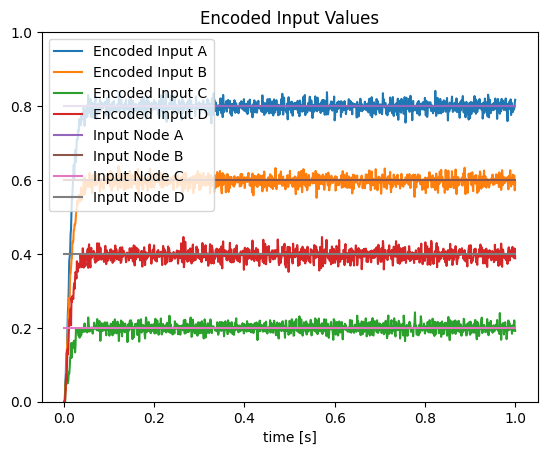

In [4]:
# Create a model to perform the sorting
model = nengo.Network(label="SortArray")
with model:
    # Add input nodes for each value of the array
    input_node_A = nengo.Node(input_array[0])
    input_node_B = nengo.Node(input_array[1])
    input_node_C = nengo.Node(input_array[2])
    input_node_D = nengo.Node(input_array[3])

    # Add neuron ensembles to encode each value of the array
    input_neuron_A = nengo.Ensemble(n_neurons=100, dimensions=1)
    input_neuron_B = nengo.Ensemble(n_neurons=100, dimensions=1)
    input_neuron_C = nengo.Ensemble(n_neurons=100, dimensions=1)
    input_neuron_D = nengo.Ensemble(n_neurons=100, dimensions=1)

    # Connect the nodes to the encoding neurons
    nengo.Connection(input_node_A, input_neuron_A)
    nengo.Connection(input_node_B, input_neuron_B)
    nengo.Connection(input_node_C, input_neuron_C)
    nengo.Connection(input_node_D, input_neuron_D)

    # Add probes so we can see the outputs at each step
    input_probe_nodeA = nengo.Probe(
        input_node_A,
    )
    input_probe_nodeB = nengo.Probe(input_node_B)
    input_probe_nodeC = nengo.Probe(input_node_C)
    input_probe_nodeD = nengo.Probe(input_node_D)

    # These probes show us how well our neurons can approximate our inputs
    input_probe_neuronA = nengo.Probe(input_neuron_A, synapse=0.01)
    input_probe_neuronB = nengo.Probe(input_neuron_B, synapse=0.01)
    input_probe_neuronC = nengo.Probe(input_neuron_C, synapse=0.01)
    input_probe_neuronD = nengo.Probe(input_neuron_D, synapse=0.01)

# Build the simulator to run the model containing just input encoding
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)

# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe_neuronA], label="Encoded Input A")
plt.plot(sim.trange(), sim.data[input_probe_neuronB], label="Encoded Input B")
plt.plot(sim.trange(), sim.data[input_probe_neuronC], label="Encoded Input C")
plt.plot(sim.trange(), sim.data[input_probe_neuronD], label="Encoded Input D")
plt.plot(sim.trange(), sim.data[input_probe_nodeA], label="Input Node A")
plt.plot(sim.trange(), sim.data[input_probe_nodeB], label="Input Node B")
plt.plot(sim.trange(), sim.data[input_probe_nodeC], label="Input Node C")
plt.plot(sim.trange(), sim.data[input_probe_nodeD], label="Input Node D")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Encoded Input Values")
plt.show()

### Set up neurons to perform the comparisons required for Bubble Sort

We need neuron ensembles to compare each of the inputs from left to right, two at a time.

From the details on the Bubble Sort algorithm, for an array of four values, you will need to perform a compare function 6 times to sort the array into ascending order.

Due to the nature of Nengo, for each of these 6 comparisons, we need a 2D neuron `combine_neuron_N` to take in the two digits to be compared, then connect the output of that neuron to a neuron that represents the greater value `larger_neuron_N` and a neuron that represents the smaller value `smaller_neuron_N`.

Notice that we set up all of these ensembles exactly as we did for our input encoding, except our comparator neurons are 2D to recieve two neuron inputs that will remain distinct inputs so they can be compared (versus all coming in at once, which would just add the input spikes).

In [5]:
with model:
    combine_neuron_1 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_2 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_3 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_4 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_5 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_6 = nengo.Ensemble(n_neurons=200, dimensions=2)

    larger_neuron_1 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_2 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_3 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_4 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_5 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_6 = nengo.Ensemble(n_neurons=200, dimensions=1)

    smaller_neuron_1 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_2 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_3 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_4 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_5 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_6 = nengo.Ensemble(n_neurons=200, dimensions=1)

We now have neurons set aside to perform the comparison functions, but in order to actually do so the network must train weights to compute the comparison of two values at a time.

In Nengo, we define a function that trains weights between each `combine_neuron_N` and `larger_neuron_N` such that the greater value is returned from the `larger_neuron_N` ensemble.

Similarly we define a function that trains weights between each `combine_neuron_N` and `smaller_neuron_N` such that the lower value is returned from the `smaller_neuron_N` ensemble.

In [6]:
with model:
    # Create a function to return the largest value
    def higher_val(x):
        if x[0] > x[1]:
            return x[0]
        else:
            return x[1]

    # Create a function to return the smaller value
    def lower_val(x):
        if x[0] < x[1]:
            return x[0]
        else:
            return x[1]

## Connect all the things!

Now we need to connect all of our neurons to sort. Pay special attention to the block diagram of our Bubble Sort implementation to connect the right neurons to one another.

In [7]:
with model:
    # Connect input nodes to the appropriate combine neuron ensembles
    # Add the functions to the larger and smaller neurons to train the weights

    # Compare 1
    nengo.Connection(input_neuron_A, combine_neuron_1[0])
    nengo.Connection(input_neuron_B, combine_neuron_1[1])

    nengo.Connection(combine_neuron_1, smaller_neuron_1, function=lower_val)
    nengo.Connection(combine_neuron_1, larger_neuron_1, function=higher_val)

    # Compare 2
    nengo.Connection(larger_neuron_1, combine_neuron_2[0])
    nengo.Connection(input_neuron_C, combine_neuron_2[1])

    nengo.Connection(combine_neuron_2, smaller_neuron_2, function=lower_val)
    nengo.Connection(combine_neuron_2, larger_neuron_2, function=higher_val)

    # Compare 3
    nengo.Connection(larger_neuron_2, combine_neuron_3[0])
    nengo.Connection(input_neuron_D, combine_neuron_3[1])

    nengo.Connection(combine_neuron_3, smaller_neuron_3, function=lower_val)
    nengo.Connection(combine_neuron_3, larger_neuron_3, function=higher_val)  # output 4

    # Compare 4
    nengo.Connection(smaller_neuron_1, combine_neuron_4[0])
    nengo.Connection(smaller_neuron_2, combine_neuron_4[1])

    nengo.Connection(combine_neuron_4, smaller_neuron_4, function=lower_val)
    nengo.Connection(combine_neuron_4, larger_neuron_4, function=higher_val)

    # Compare 5
    nengo.Connection(larger_neuron_4, combine_neuron_5[0])
    nengo.Connection(smaller_neuron_3, combine_neuron_5[1])

    nengo.Connection(combine_neuron_5, smaller_neuron_5, function=lower_val)
    nengo.Connection(combine_neuron_5, larger_neuron_5, function=higher_val)  # output 3

    # Compare 6
    nengo.Connection(smaller_neuron_4, combine_neuron_6[0])
    nengo.Connection(smaller_neuron_5, combine_neuron_6[1])

    nengo.Connection(combine_neuron_6, smaller_neuron_6, function=lower_val)  # output 1
    nengo.Connection(combine_neuron_6, larger_neuron_6, function=higher_val)  # output 2

Add probes to the output so that we can see how well our neurons sorted our input array.

In [8]:
with model:
    # add probes to output neurons (those contributing to the sorted array)
    out_probe_1 = nengo.Probe(smaller_neuron_6, synapse=0.01)
    out_probe_2 = nengo.Probe(larger_neuron_6, synapse=0.01)
    out_probe_3 = nengo.Probe(larger_neuron_5, synapse=0.01)
    out_probe_4 = nengo.Probe(larger_neuron_3, synapse=0.01)

    ## add debug probes (or probes if you want to see all of the steps)
    # compare_probe_1 = nengo.Probe(combine_neuron_1,synapse=0.01)
    # compare_probe_2 = nengo.Probe(combine_neuron_2,synapse=0.01)
    # compare_probe_3 = nengo.Probe(combine_neuron_3,synapse=0.01)
    # compare_probe_4 = nengo.Probe(combine_neuron_4,synapse=0.01)
    # compare_probe_5 = nengo.Probe(combine_neuron_5,synapse=0.01)
    # compare_probe_6 = nengo.Probe(combine_neuron_6,synapse=0.01)
    # smaller_probe_1 = nengo.Probe(smaller_neuron_1,synapse=0.01)
    # smaller_probe_2 = nengo.Probe(smaller_neuron_2,synapse=0.01)
    # smaller_probe_3 = nengo.Probe(smaller_neuron_3,synapse=0.01)
    # smaller_probe_4 = nengo.Probe(smaller_neuron_4,synapse=0.01)
    # smaller_probe_5 = nengo.Probe(smaller_neuron_5,synapse=0.01)
    # smaller_probe_6 = nengo.Probe(smaller_neuron_6,synapse=0.01)
    # larger_probe_1 = nengo.Probe(larger_neuron_1,synapse=0.01)
    # larger_probe_2 = nengo.Probe(larger_neuron_2,synapse=0.01)
    # larger_probe_3 = nengo.Probe(larger_neuron_3,synapse=0.01)
    # larger_probe_4 = nengo.Probe(larger_neuron_4,synapse=0.01)
    # larger_probe_5 = nengo.Probe(larger_neuron_5,synapse=0.01)
    # larger_probe_6 = nengo.Probe(larger_neuron_6,synapse=0.01)

Create your simulator to run the neuron dynamics over time

In [9]:
with nengo.Simulator(model) as sim:
    # Run it for 2 seconds
    sim.run(2)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Plot the data!

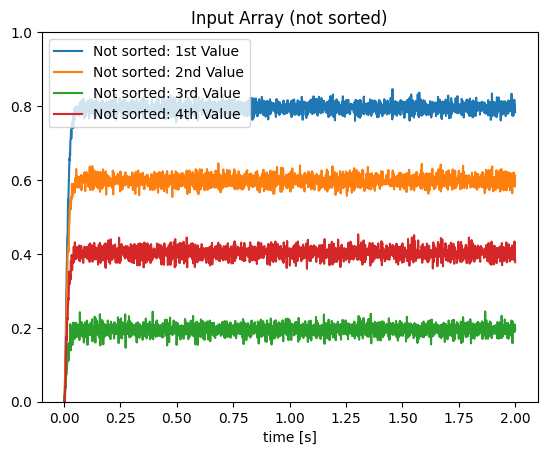

Input Array = [0.8 0.6 0.2 0.4]


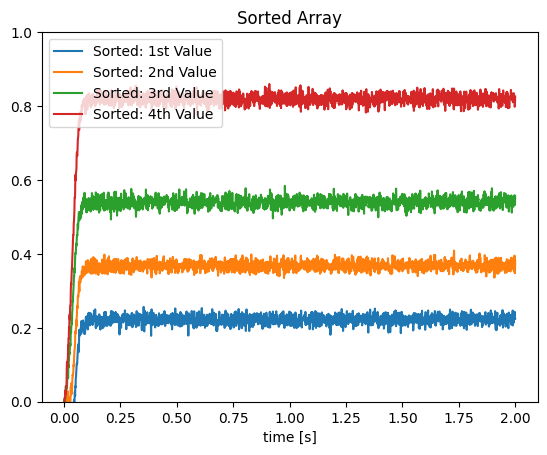

In [10]:
## Plot the results!
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe_neuronA], label="Not sorted: 1st Value")
plt.plot(sim.trange(), sim.data[input_probe_neuronB], label="Not sorted: 2nd Value")
plt.plot(sim.trange(), sim.data[input_probe_neuronC], label="Not sorted: 3rd Value")
plt.plot(sim.trange(), sim.data[input_probe_neuronD], label="Not sorted: 4th Value")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Input Array (not sorted)")
plt.show()

print("Input Array =", input_array)

## Plot the results!
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[out_probe_1], label="Sorted: 1st Value")
plt.plot(sim.trange(), sim.data[out_probe_2], label="Sorted: 2nd Value")
plt.plot(sim.trange(), sim.data[out_probe_3], label="Sorted: 3rd Value")
plt.plot(sim.trange(), sim.data[out_probe_4], label="Sorted: 4th Value")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Sorted Array")
plt.show()

## Discussion

ICE3 next lecture
- You will build directly off of this for ICE3 (no fill in the blanks on this one!). Name your ICE3 file `ICE3_BubbleSort.ipynb`.
- Generalize to any sized array (you should be able to give it any input array and automatically adjust the number of neuron ensembles required to sort your array).
- Choose neuron parameters to handle array values greater than 1 as well as negative values smaller than -1. (you should be able to give it any input array and automatically choose the best radii and number of neurons required to sort your array). 
- Verify that your Nengo model works properly for the following arrays _without changing anything about your generalized code_:
$$\begin{bmatrix} .8 & .2 & .6 & .4  \end{bmatrix}$$
$$\begin{bmatrix} 10 & -3 & 6  & -8 & 3 & 1 & -6 \end{bmatrix}$$
$$\begin{bmatrix} 1 & -2 & -14 & 4 & -5 & -8 & 7 & 10 & -11 & 15 \end{bmatrix}$$
$$\begin{bmatrix} -4 & 2 & 0  & 4 & -3 & -5\end{bmatrix}$$
$$\begin{bmatrix} .8 & -.2 & .6 & .4 & -.7  \end{bmatrix}$$
